# Pitch and Timbre Analysis

This notebook demonstrates how to perform pitch and timbre analysis on audio files using the CTC-SpeechRefinement package. We'll explore various techniques for analyzing pitch, harmonics, and timbral characteristics of audio signals.

## Setup

First, let's import the necessary libraries and set up the environment.

In [1]:
# Add the project root to the Python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import seaborn as sns
from IPython.display import Audio, display
import glob
from pathlib import Path

# Import from the project
from ctc_speech_refinement.core.preprocessing.audio import load_audio
from ctc_speech_refinement.core.eda.pitch_timbre import analyze_pitch_timbre

# Set up plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

/home/ngocducpc/miniconda3/envs/speech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Audio Data

Let's load an audio file and examine its basic properties.

In [2]:
# Define the path to an audio file
audio_file = "../data/speech2text/input/test1_01.wav"  # Path to the audio file

# Load the audio file using our package's function
audio_data, sample_rate = load_audio(audio_file)

# Print basic information
print(f"Audio file: {audio_file}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Number of samples: {len(audio_data)}")

# Play the audio
display(Audio(audio_data, rate=sample_rate))

2025-05-07 11:58:48,144 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:58:48,799 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000


Audio file: ../data/speech2text/input/test1_01.wav
Sample rate: 16000 Hz
Duration: 13.32 seconds
Number of samples: 213200


## Comprehensive Pitch and Timbre Analysis

Let's use our package's analyze_pitch_timbre function to perform a comprehensive analysis of the pitch and timbre characteristics of the audio.

2025-05-07 11:58:48,815 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Performing pitch and timbre analysis
2025-05-07 11:58:48,816 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Estimating pitch
2025-05-07 11:58:50,703 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Extracting 13 MFCC features for timbre analysis
2025-05-07 11:58:50,709 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting pitch estimation
2025-05-07 11:58:50,814 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting pitch distribution
2025-05-07 11:58:50,866 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting MFCC features
2025-05-07 11:58:50,891 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting MFCC statistics



Pitch Statistics:
mean: 162.0029292801631
median: 160.5845763726753
std: 37.86959109948058
min: 54.841248984731294
max: 239.21922434748075
range: 184.37797536274945

MFCC Statistics:
means: [-205.57041931152344, 96.37474822998047, -17.031221389770508, 22.902294158935547, -2.4596896171569824, -14.005746841430664, 7.286258220672607, -30.325302124023438, -11.680181503295898, -2.5203020572662354, -10.501797676086426, -1.0098979473114014, -15.405900955200195]
stds: [126.80010223388672, 53.944522857666016, 42.747737884521484, 28.51112174987793, 23.158052444458008, 22.179441452026367, 17.954973220825195, 18.835378646850586, 13.754758834838867, 11.633844375610352, 11.790244102478027, 9.518167495727539, 9.900470733642578]


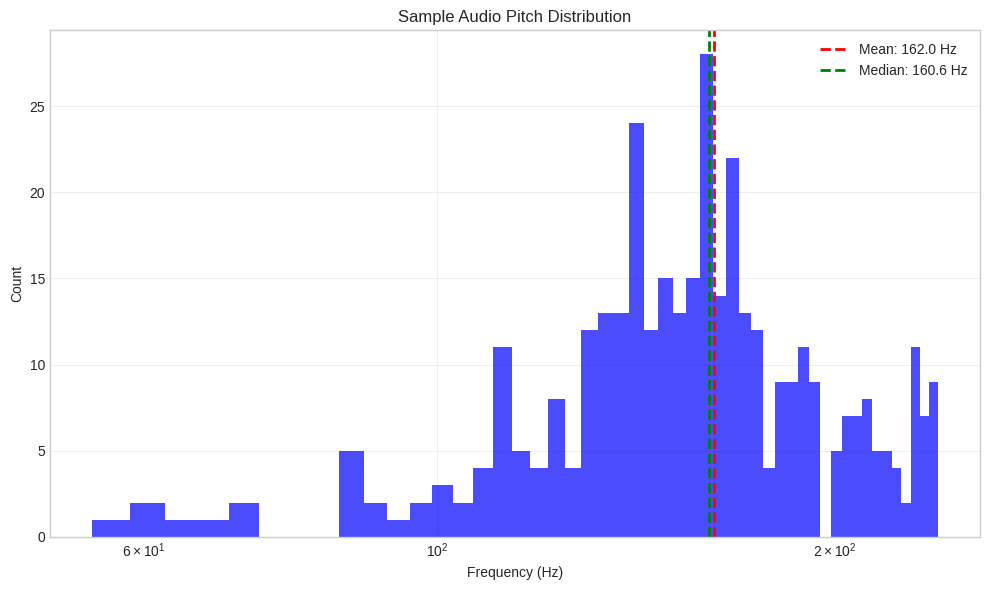

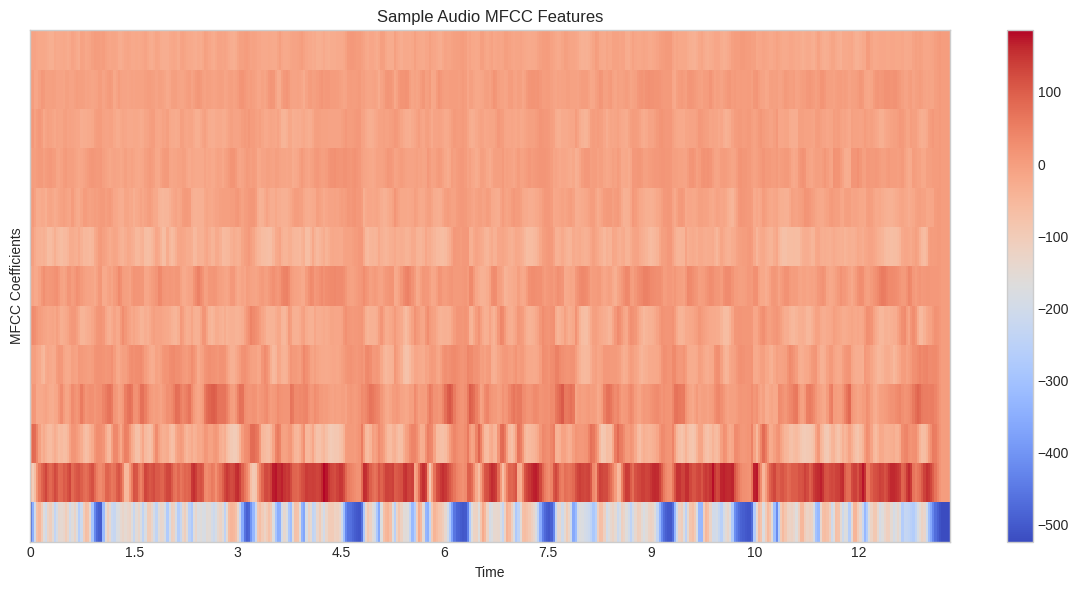

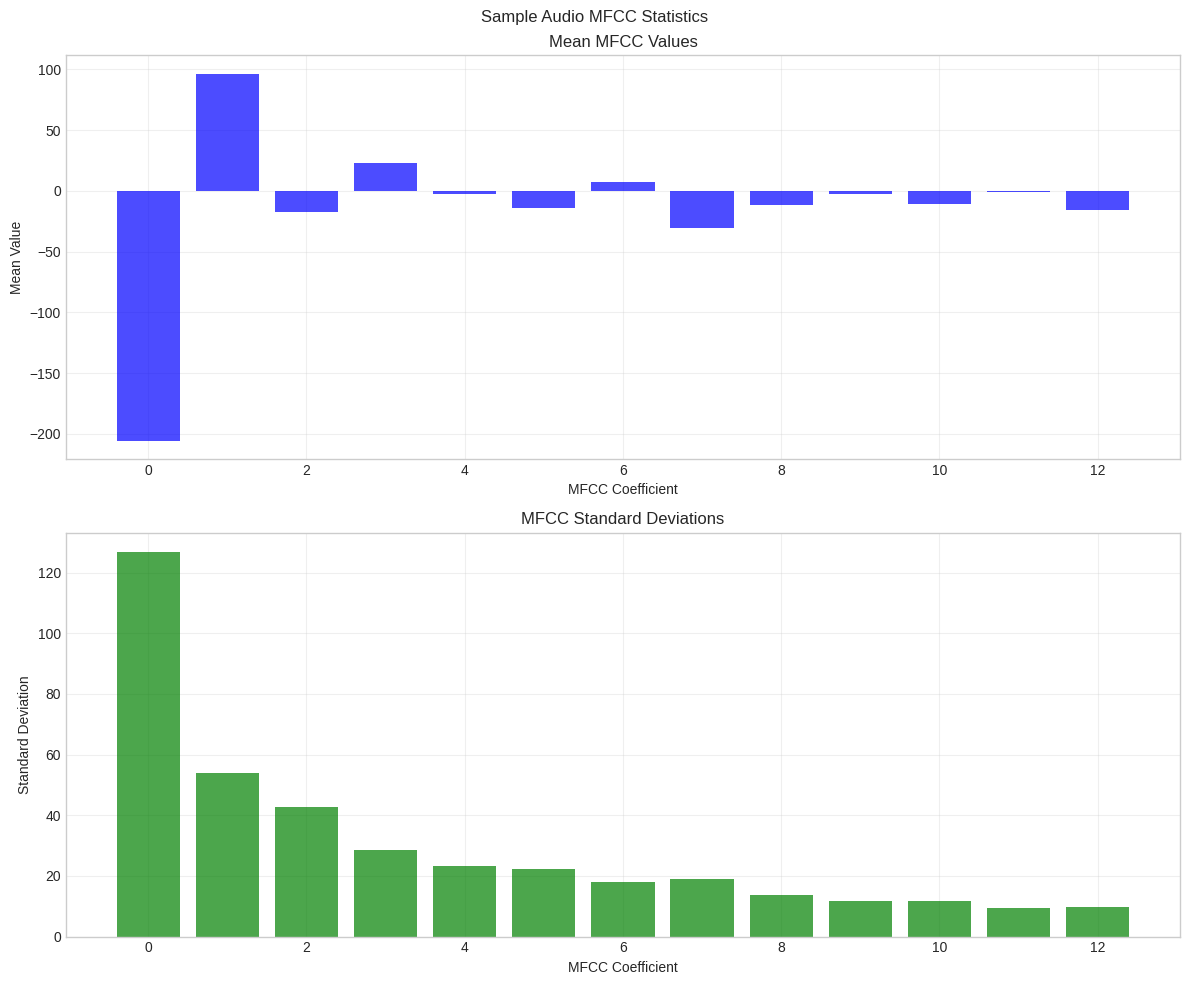

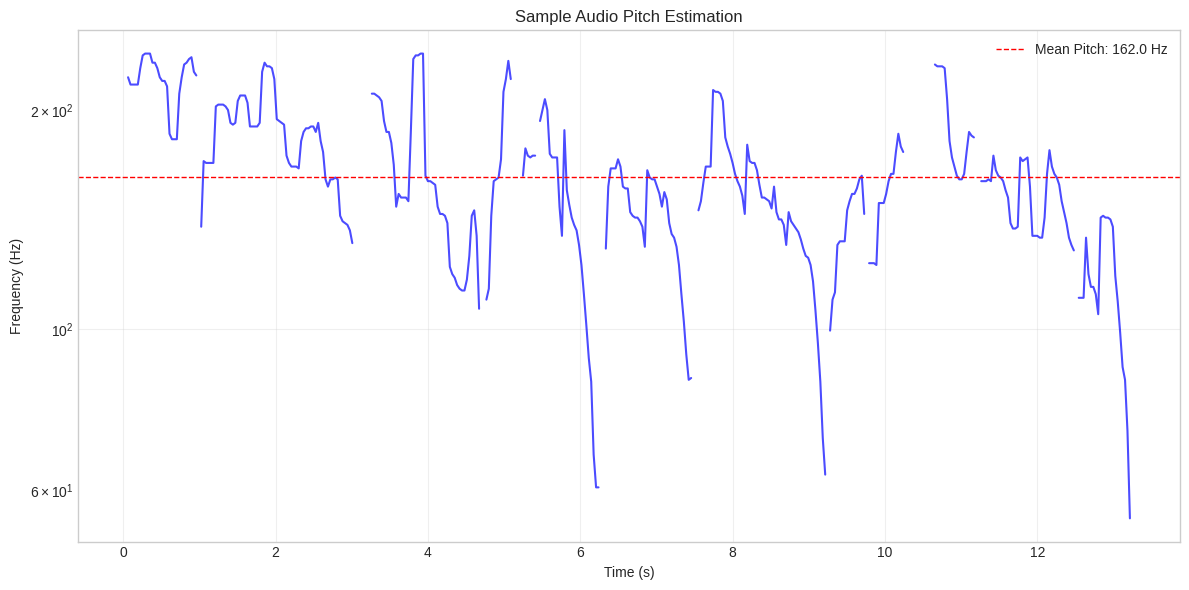

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [3]:
# Use our package's function to analyze pitch and timbre features
pitch_timbre_results = analyze_pitch_timbre(audio_data, sample_rate, title_prefix="Sample Audio")

# Display the pitch statistics
print("\nPitch Statistics:")
for stat, value in pitch_timbre_results['pitch_stats'].items():
    print(f"{stat}: {value}")

# Display the MFCC statistics
print("\nMFCC Statistics:")
for stat, value in pitch_timbre_results['mfcc_stats'].items():
    print(f"{stat}: {value}")

# Display the figures
for fig_name, fig in pitch_timbre_results['figures'].items():
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## Detailed Pitch Analysis

Now let's explore pitch analysis in more detail.

### 1. Fundamental Frequency (F0) Estimation

The fundamental frequency (F0) is the lowest frequency of a periodic waveform. In speech, it corresponds to the perceived pitch.

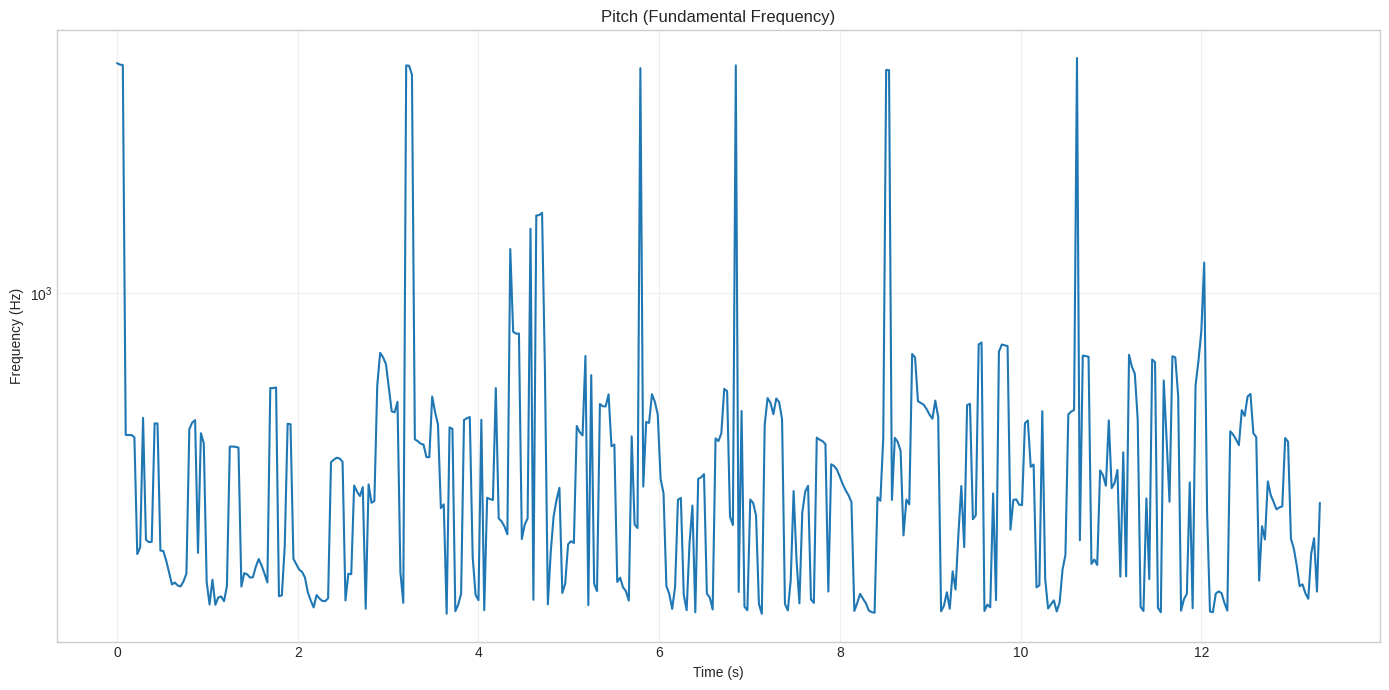

In [4]:
# Compute pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=audio_data, sr=sample_rate, n_fft=2048, hop_length=512)
pitch_times = librosa.times_like(pitches[0], sr=sample_rate, hop_length=512)

# Extract the pitch with highest magnitude at each time
pitch = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch.append(pitches[index, t])

# Filter out zero values (silence or unvoiced segments)
pitch_times_filtered = []
pitch_filtered = []
for i, p in enumerate(pitch):
    if p > 0:
        pitch_filtered.append(p)
        pitch_times_filtered.append(pitch_times[i])

# Plot pitch
plt.figure(figsize=(14, 7))
plt.semilogy(pitch_times_filtered, pitch_filtered)
plt.title('Pitch (Fundamental Frequency)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Pitch Distribution

Let's analyze the distribution of pitch values to understand the range and variability of pitch in the audio.

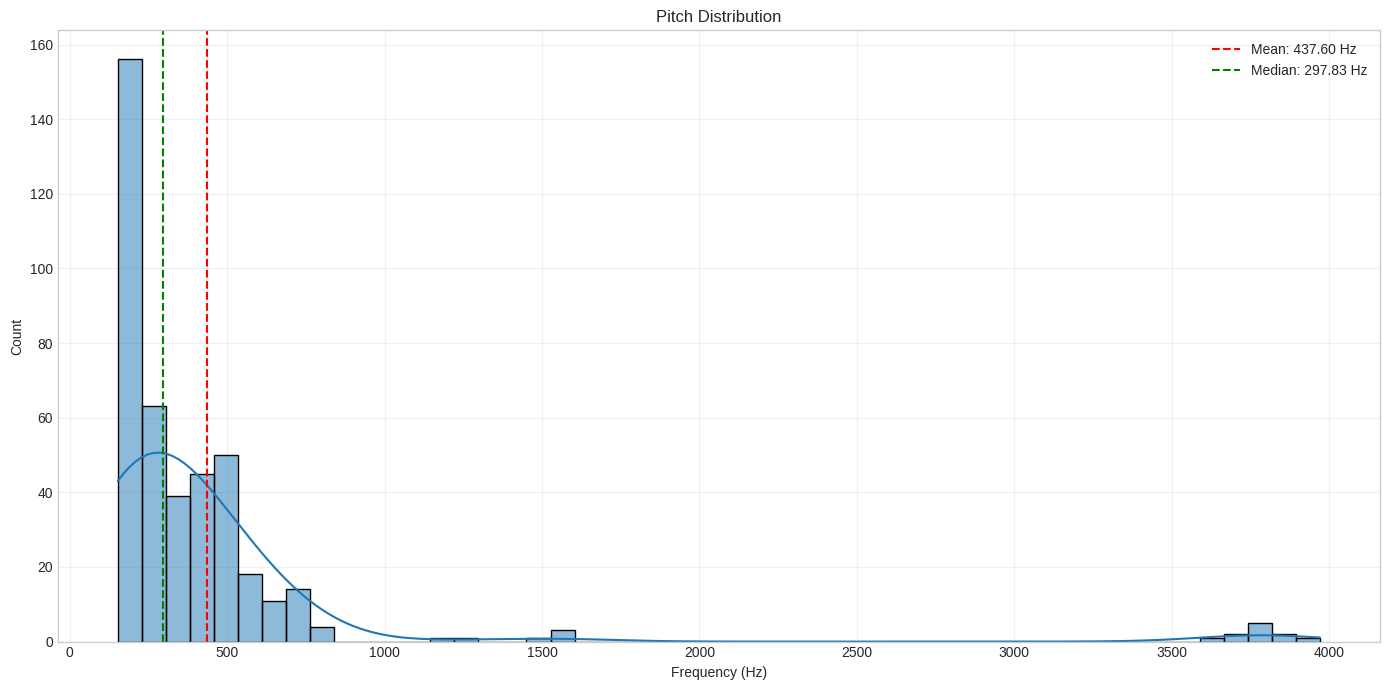

In [5]:
# Plot pitch distribution
plt.figure(figsize=(14, 7))
sns.histplot(pitch_filtered, kde=True)
plt.axvline(np.mean(pitch_filtered), color='r', linestyle='--', label=f'Mean: {np.mean(pitch_filtered):.2f} Hz')
plt.axvline(np.median(pitch_filtered), color='g', linestyle='--', label=f'Median: {np.median(pitch_filtered):.2f} Hz')
plt.title('Pitch Distribution')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Harmonic Components

Let's analyze the harmonic components of the audio using the harmonic-percussive source separation technique.

Harmonic Component:


Percussive Component:


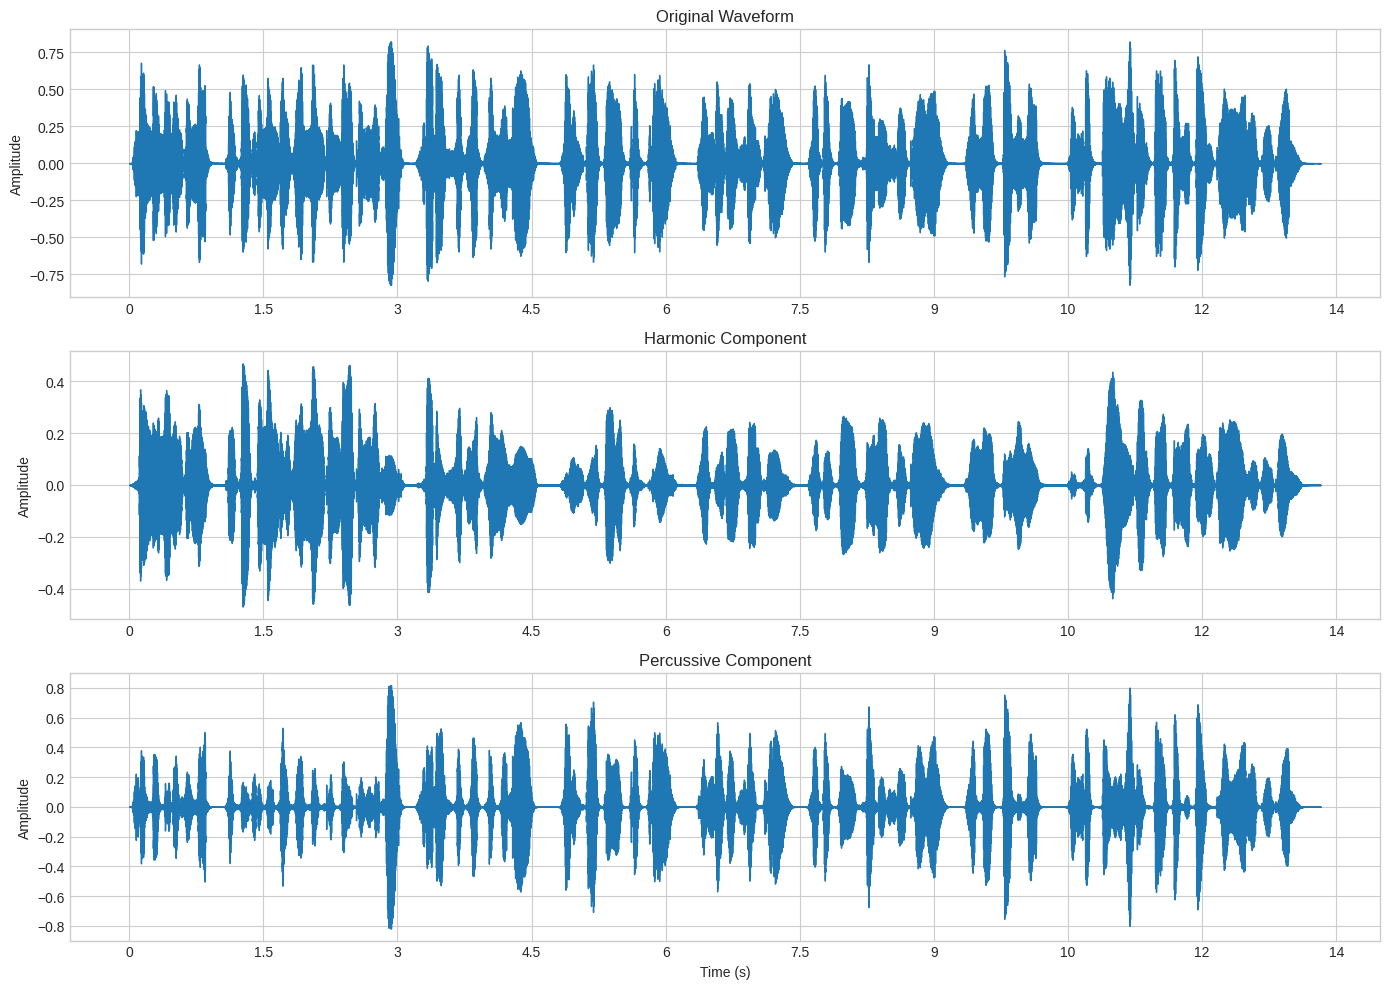

In [6]:
# Separate harmonic and percussive components
harmonic, percussive = librosa.effects.hpss(audio_data)

# Play the harmonic component
print("Harmonic Component:")
display(Audio(harmonic, rate=sample_rate))

# Play the percussive component
print("Percussive Component:")
display(Audio(percussive, rate=sample_rate))

# Plot waveforms
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10))

librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax1)
ax1.set_title('Original Waveform')
ax1.set_xlabel('')
ax1.set_ylabel('Amplitude')

librosa.display.waveshow(harmonic, sr=sample_rate, ax=ax2)
ax2.set_title('Harmonic Component')
ax2.set_xlabel('')
ax2.set_ylabel('Amplitude')

librosa.display.waveshow(percussive, sr=sample_rate, ax=ax3)
ax3.set_title('Percussive Component')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Detailed Timbre Analysis

Now let's explore timbre analysis in more detail.

### 1. Mel-Frequency Cepstral Coefficients (MFCCs)

MFCCs are coefficients that collectively make up an MFC (Mel-frequency cepstrum), which is a representation of the short-term power spectrum of a sound. They are widely used in speech recognition and music information retrieval.

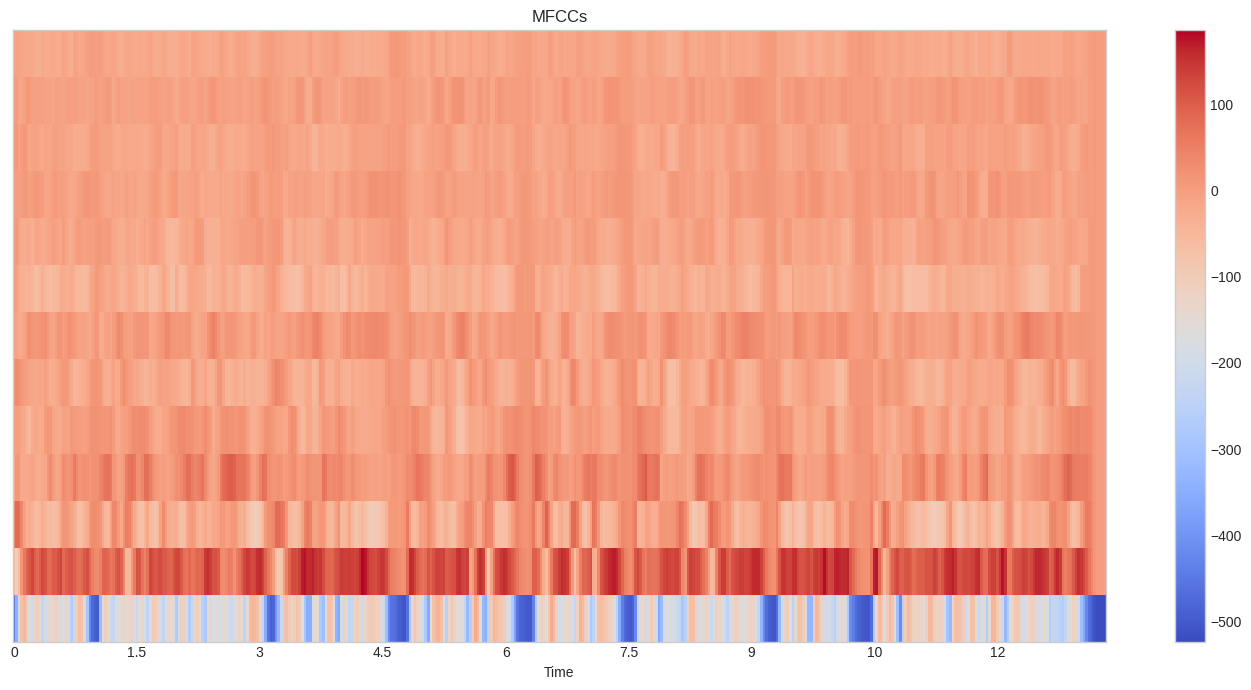

In [7]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)

# Plot MFCCs
plt.figure(figsize=(14, 7))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', hop_length=512)
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

### 2. Delta and Delta-Delta MFCCs

Delta and delta-delta (acceleration) coefficients are computed from the MFCCs to capture the dynamics of the signal.

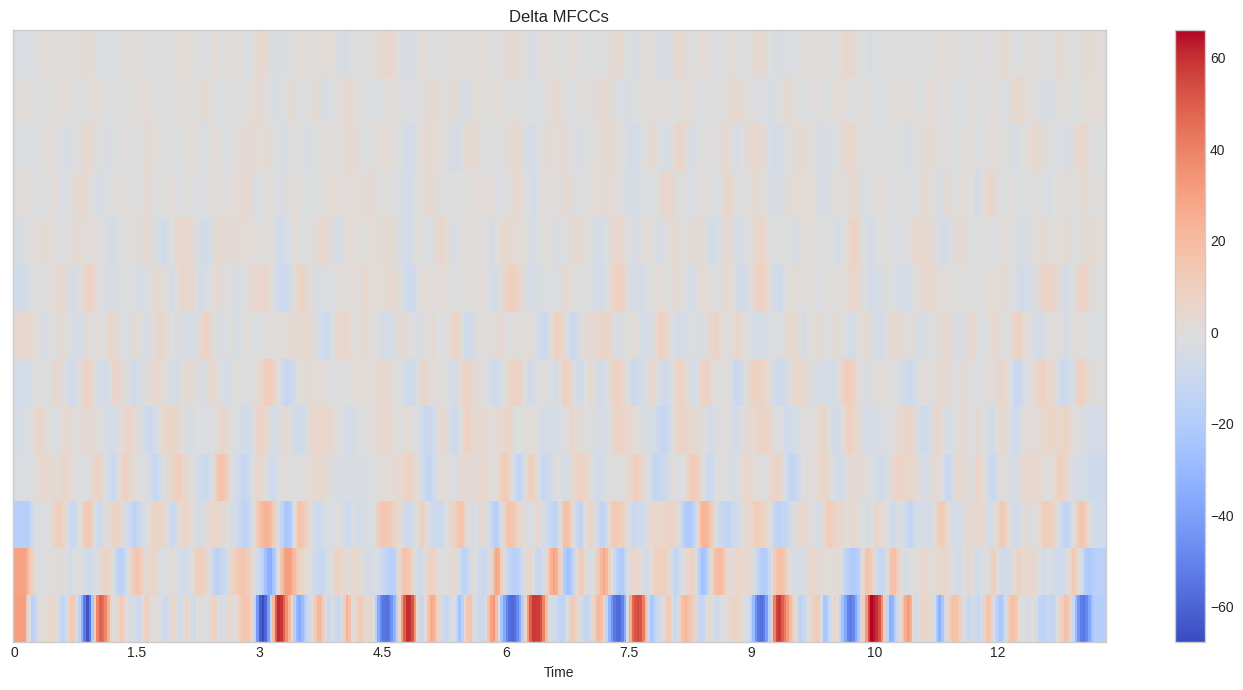

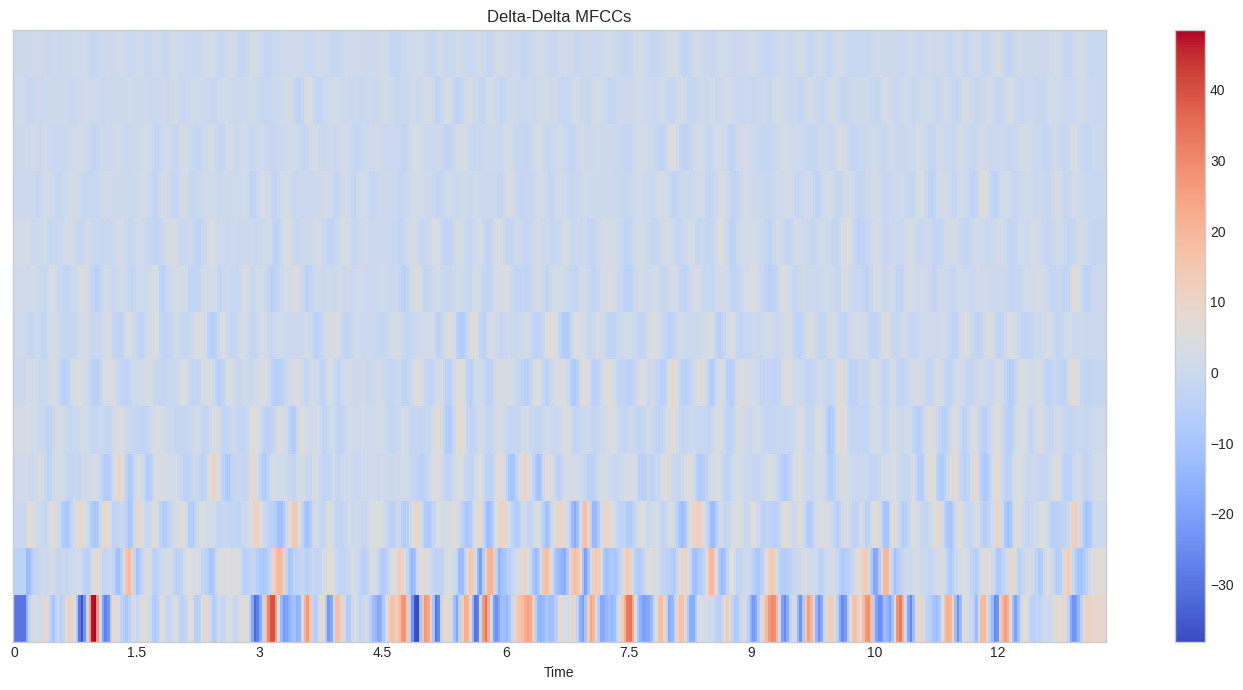

In [8]:
# Compute delta and delta-delta MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

# Plot delta MFCCs
plt.figure(figsize=(14, 7))
librosa.display.specshow(delta_mfccs, sr=sample_rate, x_axis='time', hop_length=512)
plt.colorbar()
plt.title('Delta MFCCs')
plt.tight_layout()
plt.show()

# Plot delta-delta MFCCs
plt.figure(figsize=(14, 7))
librosa.display.specshow(delta2_mfccs, sr=sample_rate, x_axis='time', hop_length=512)
plt.colorbar()
plt.title('Delta-Delta MFCCs')
plt.tight_layout()
plt.show()

### 3. Chromagram

A chromagram represents the distribution of energy along the 12 pitch classes (C, C#, D, etc.). It is useful for analyzing the harmonic content of music.

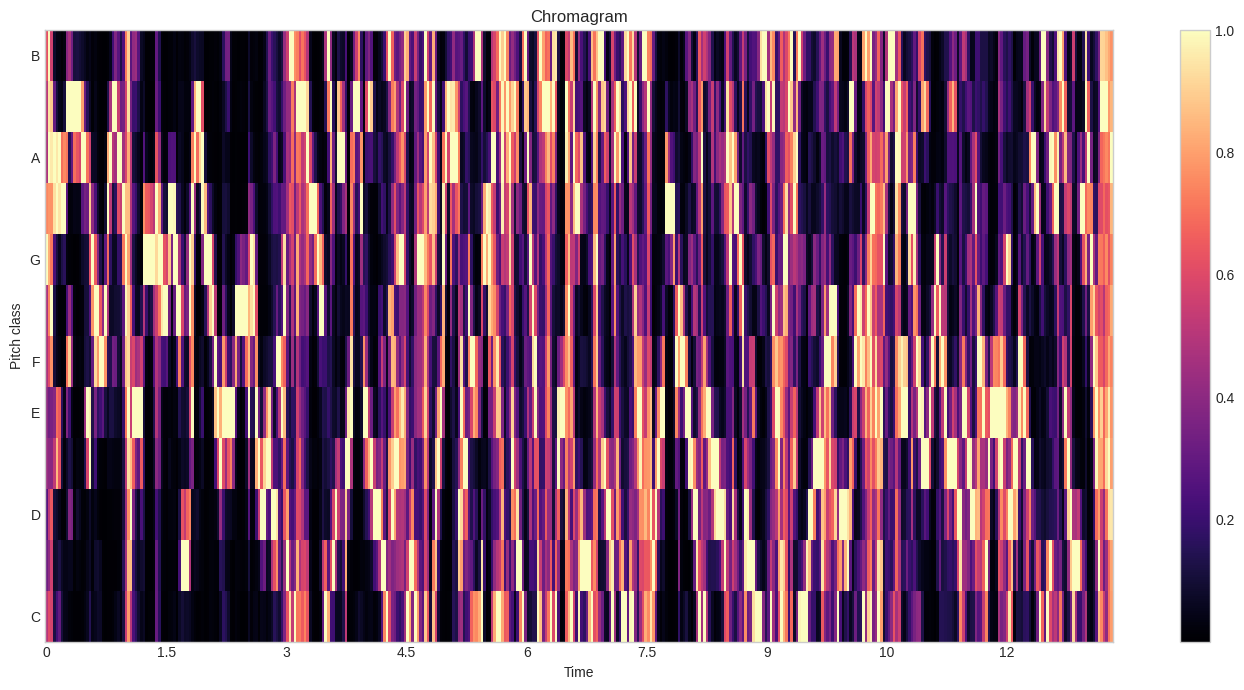

In [9]:
# Compute chromagram
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate, n_fft=2048, hop_length=512)

# Plot chromagram
plt.figure(figsize=(14, 7))
librosa.display.specshow(chroma, sr=sample_rate, x_axis='time', y_axis='chroma', hop_length=512)
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've performed a comprehensive pitch and timbre analysis of an audio file using the CTC-SpeechRefinement package. We've examined various features including fundamental frequency, harmonic components, MFCCs, delta MFCCs, and chromagram. These features provide valuable insights into the pitch and timbral characteristics of the audio signal, which can be useful for speech recognition tasks, speaker identification, and other audio processing applications.